<a href="https://colab.research.google.com/github/BrianM50/MAT-422/blob/main/Section_2_3_(Independent_Variables_and_Random_Samples).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Joint probablity is the probablity that two or more events occur together. A joint probablity distribution shows a probablity distribution for two or more random variabes. 


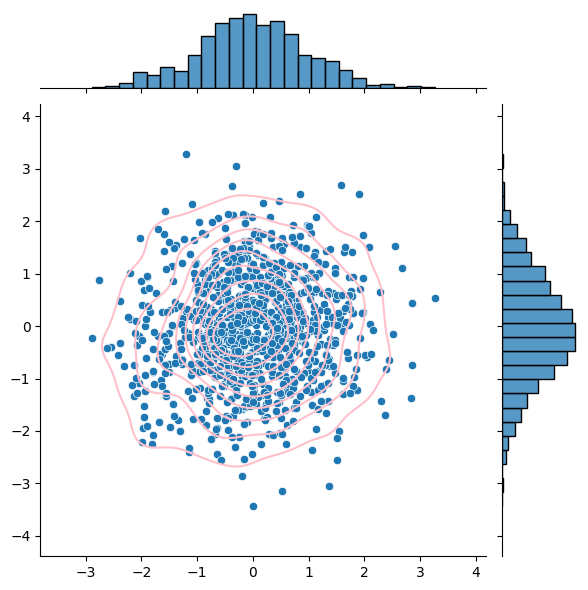

There is no trend among the data points because the two variables a and b are not related.


In [ ]:
print('Joint probablity is the probablity that two or more events occur together. A joint probablity distribution shows a probablity distribution for two or more random variabes. ')
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
df = pd.DataFrame({'x':a, 'y':b})
sns.jointplot(x=a,y=b,data=df,kind='scatter').plot_joint(sns.kdeplot, color='pink')
plt.show()
print('There is no trend among the data points because the two variables a and b are not related.')

Correlation is any statistical relationship between two random variables.
The Correlation can be measured using the Pearsons Correlation Coefficient, which measures the linear relationship between two random variables. The equation is given as:
ρX,Y = σXY/σXσY
Where σXY is the covariance between X and Y. 
 σX is the standard deviation of X. 
 ρ is the Pearsons correlation coefficient

[[ 1.  -0.7]
 [-0.7  1. ]]

We stack a few vertical sets together.
The first one is a random uniform distribution reference, the second is a postive relation so its correlation should be 1, the third is a negative relation so it should be -1, the fourth is random so its correlation should be 0.


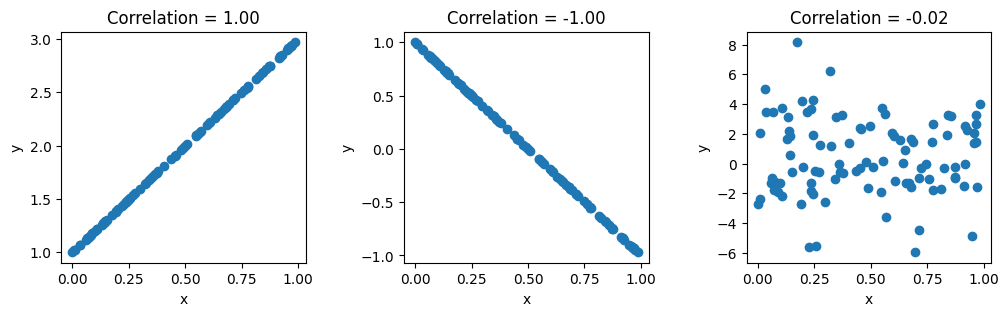

In [4]:
print('Correlation is any statistical relationship between two random variables.')
print('The Correlation can be measured using the Pearsons Correlation Coefficient, which measures the linear relationship between two random variables. The equation is given as:')
print('ρX,Y = σXY/σXσY')
print('Where σXY is the covariance between X and Y. \n σX is the standard deviation of X. \n ρ is the Pearsons correlation coefficient')
print('')

import matplotlib.pyplot as plt

x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
my_rho = np.corrcoef(x_simple, y_simple)
print(my_rho)
print('')

seed = 13
rand = np.random.RandomState(seed)
x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))
print('We stack a few vertical sets together.')
print('The first one is a random uniform distribution reference, the second is a postive relation so its correlation should be 1, the third is a negative relation so it should be -1, the fourth is random so its correlation should be 0.')

rho = np.corrcoef(x)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
  ax[i].scatter(x[0,],x[1+i,])
  ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
  ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)
plt.show()


Adding noise to the matrix x can show us how the correlation coefficient changes by changing the relationship between the two variables.


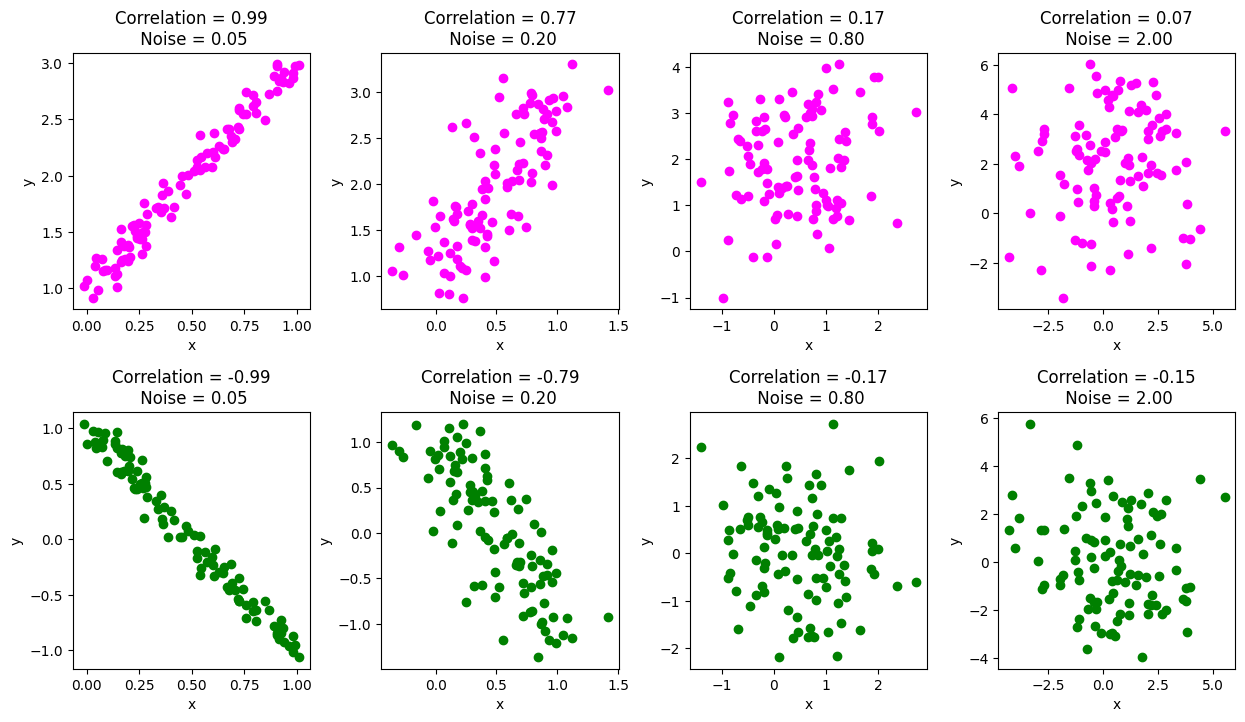

This shows us that with more noise added to a dataset, the correlation gets weaker between the two variables.


In [ ]:
print('Adding noise to the matrix x can show us how the correlation coefficient changes by changing the relationship between the two variables.')
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]):
  x_with_noise = x+rand.normal(0,noise,x.shape)
  rho_noise = np.corrcoef(x_with_noise)
  ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
  ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
  ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1]) + '\n Noise = ' + "{:.2f}".format(noise) )
  ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2]) + '\n Noise = ' + "{:.2f}".format(noise))
  ax[0,i].set(xlabel='x',ylabel='y')
  ax[1,i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=0.3,hspace=0.4)
plt.show()
print('This shows us that with more noise added to a dataset, the correlation gets weaker between the two variables.')

The correlation only measures the linear relationship between two variables.


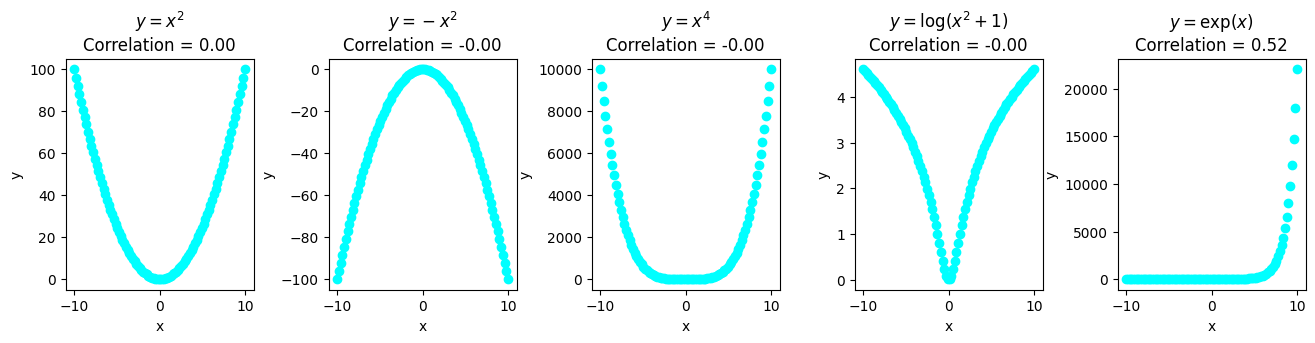

Since these graphs do not display a linear correlation they have a correlation of 0, but this does not mean the variables have no association.
The last graph that displays y=exp(x) shows a correlation of 0.52, which is not the true association between the two variables.


In [ ]:
print('The correlation only measures the linear relationship between two variables.')

x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2))
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))
rho_nonlinear = np.corrcoef(x_nonlinear)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
  ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan')
  ax[i].title.set_text(title[i] + '\n' + 'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
  ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)
plt.show()
print('Since these graphs do not display a linear correlation they have a correlation of 0, but this does not mean the variables have no association.')
print('The last graph that displays y=exp(x) shows a correlation of 0.52, which is not the true association between the two variables.')

Central Limit Theorem states that the more samples taken from a distribution, the sample averages will move towards a normal distribution regardless of the population distribution.


<Axes: title={'center': 'Normal Distribution'}, ylabel='Density'>

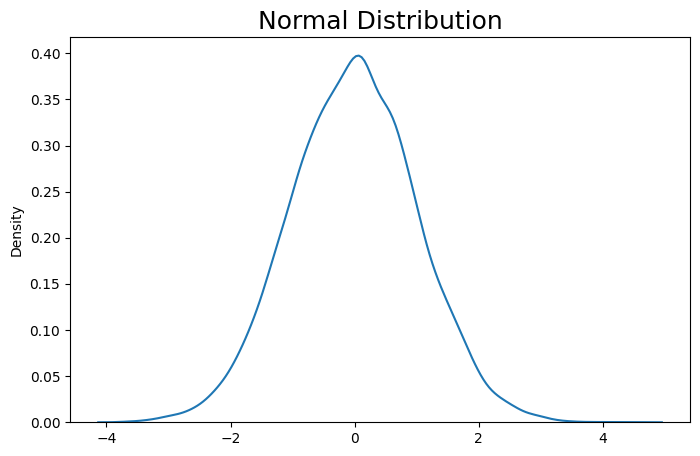

In [ ]:
print('Central Limit Theorem states that the more samples taken from a distribution, the sample averages will move towards a normal distribution regardless of the population distribution.')

#This function will create random samples from a distribution by inputting a population, number of samples needed, and the number of observations each sample includes.
def random_samples(population, sample_qty, sample_size):
  sample_means = []
  for i in range(sample_qty):
    sample = population.sample(n=sample_size)
    sample_mean = np.array(sample).mean()
    sample_means.append(sample_mean)
  return sample_means

norm = list(np.random.randn(10000))
plt.figure(figsize=(8,5))
plt.title("Normal Distribution", fontsize=18)
sns.kdeplot(norm)



Taking 30 samples from this population and having each sample include 30 values. We can see that the graph is close to normal, but still a bit off.


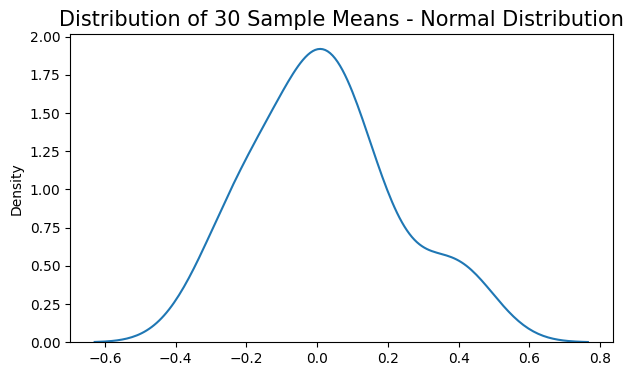

In [ ]:
population = pd.Series(norm)
samples_from_normal = random_samples(population, 30, 30)
plt.figure(figsize=(7,4))
plt.title("Distribution of 30 Sample Means - Normal Distribution",
fontsize=15)
sns.kdeplot(samples_from_normal)
print('Taking 30 samples from this population and having each sample include 30 values. We can see that the graph is close to normal, but still a bit off.')

This time we will take 100 samples from this population and have each sample include 100 values, to see how the graph is affected
The graph with 100 samples looks more normal than the graph with 30 samples. 


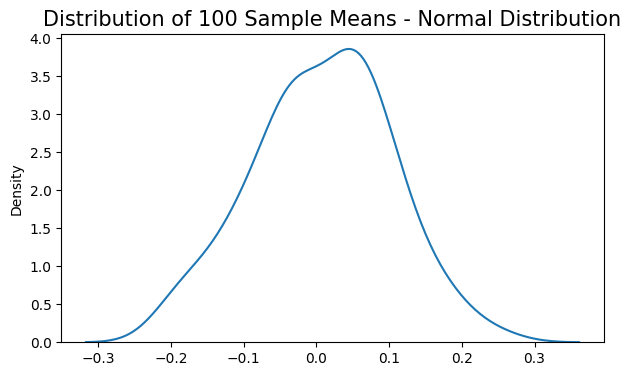

In [ ]:
print('This time we will take 100 samples from this population and have each sample include 100 values, to see how the graph is affected')
samples_from_normal2 = random_samples(population, 100, 100)
plt.figure(figsize=(7,4))
plt.title("Distribution of 100 Sample Means - Normal Distribution",
fontsize=15)
sns.kdeplot(samples_from_normal2)
print('The graph with 100 samples looks more normal than the graph with 30 samples. ')